## ANOVA
- https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/interpret-the-results/key-results/
- https://www.reneshbedre.com/blog/anova.html




## ANOVA + TUKEY
- https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda

In [103]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f_oneway
from scikit_posthocs import posthoc_tukey




DATA_PATH = 'data/dados_para_teste.csv'

In [104]:
data = pd.read_csv(path.join('..', DATA_PATH))
data.head()

,n,classifier,cnn,Training accuracy,Test accuracy,Training recall,Test recall,Training precision,Test precision,Training f1 Score,Test f1 Score
0,0,RANDON FOREST,inceptionv3,99.0,97.32,100.0,96.44,97.29,96.29,95.0,96.0
1,1,RANDON FOREST,inceptionv3,100.0,97.32,98.0,98.44,97.29,98.29,99.0,98.0
2,2,RANDON FOREST,inceptionv3,100.0,97.32,100.0,97.44,97.29,97.29,97.0,97.0
3,3,RANDON FOREST,inceptionv3,100.0,97.32,99.0,97.94,97.29,97.79,98.0,97.5
4,4,RANDON FOREST,inceptionv3,99.5,97.32,100.0,96.94,97.29,96.79,96.0,96.5


In [105]:
data.shape

(10400, 11)

<AxesSubplot: >

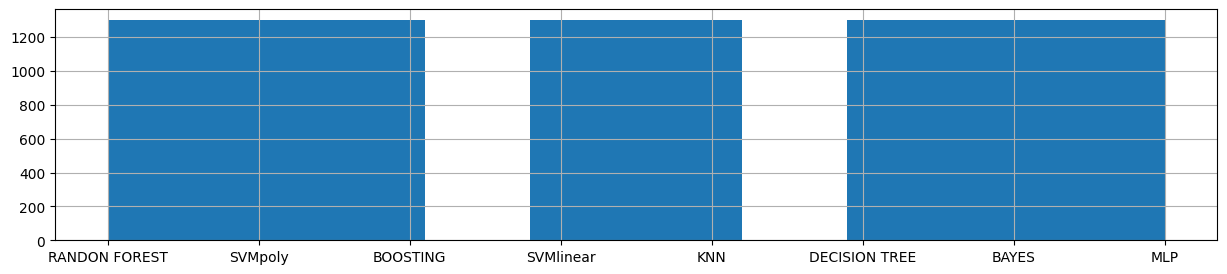

In [106]:
plt.figure(figsize=(15,3))
data['classifier'].hist()

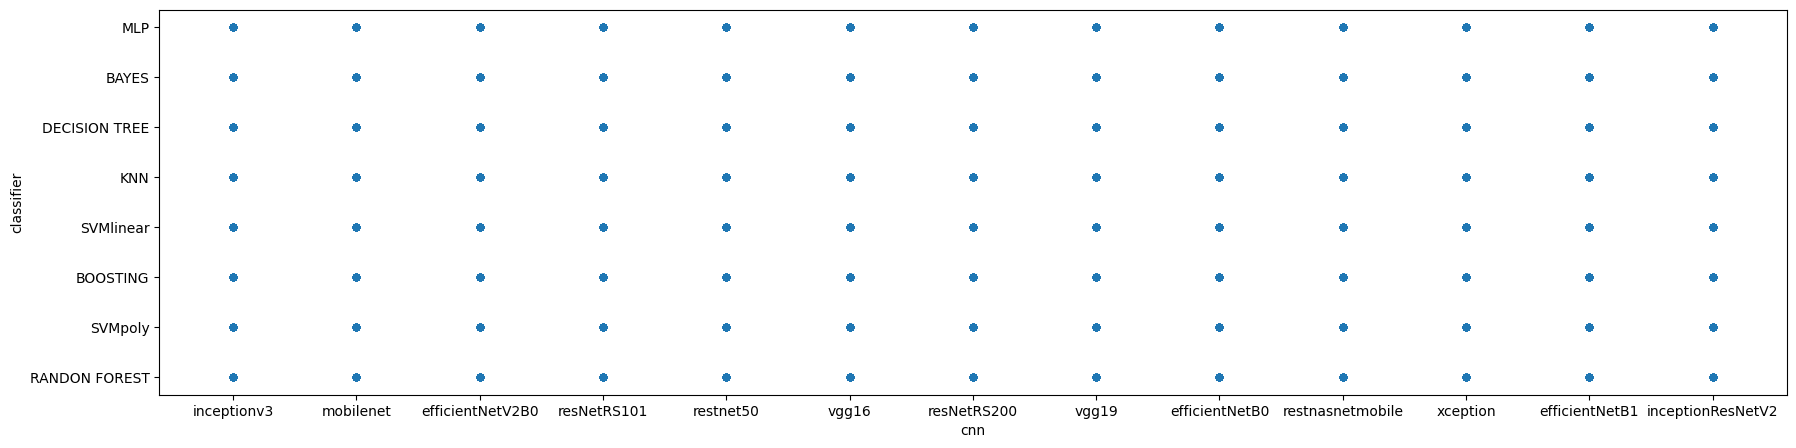

In [107]:
ax = data.plot(x='cnn', y='classifier', kind='scatter')
fig = plt.gcf()
fig.set_size_inches(21, 5)

In [108]:
groups_cnn = data.groupby('cnn')
groups_cnn.groups.keys()

dict_keys(['efficientNetB0', 'efficientNetB1', 'efficientNetV2B0', 'inceptionResNetV2', 'inceptionv3', 'mobilenet', 'resNetRS101', 'resNetRS200', 'restnasnetmobile', 'restnet50', 'vgg16', 'vgg19', 'xception'])

In [109]:
grousp_clf = groups_cnn.get_group('inceptionv3').groupby('classifier')
grousp_clf.groups.keys()

dict_keys(['BAYES', 'BOOSTING', 'DECISION TREE', 'KNN', 'MLP', 'RANDON FOREST', 'SVMlinear', 'SVMpoly'])

In [110]:
f_oneway(*(grousp_clf.get_group(group)['Test accuracy'] for group in grousp_clf.groups.keys()))

F_onewayResult(statistic=42824.40901884173, pvalue=0.0)

In [111]:
def plot_anova_results(*groups):
    # Perform one-way ANOVA
    f_value, p_value = f_oneway(*groups)

    # Prepare data for plotting
    group_names = [f'Group {i+1}' for i in range(len(groups))]
    group_means = [group.mean() for group in groups]

    # Plot the means
    plt.bar(group_names, group_means)

    # Add labels and title
    plt.xlabel('Groups')
    plt.ylabel('Means')
    plt.title('ANOVA Results')

    # Add ANOVA result text
    plt.text(len(groups) // 2, max(group_means) * 0.9, f'F-value: {f_value:.2f}\np-value: {p_value:.4f}',
             ha='center', va='center', fontsize=12)

    # Show the plot
    plt.show()

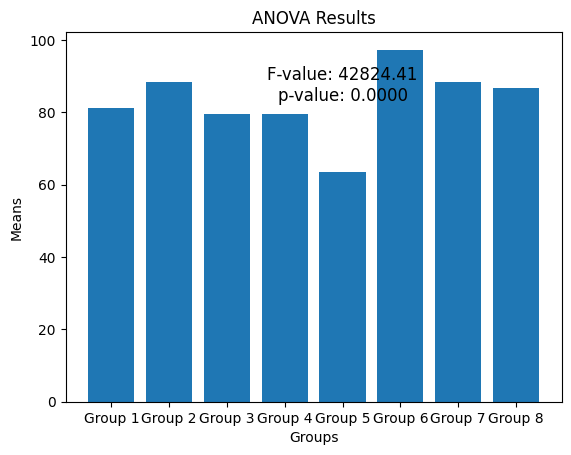

In [112]:
plot_anova_results(*(grousp_clf.get_group(group)['Test accuracy'] for group in grousp_clf.groups.keys()))

In [113]:
tukey_df = posthoc_tukey(groups_cnn.get_group('inceptionv3'), val_col="Test accuracy", group_col="classifier")
tukey_df

,RANDON FOREST,SVMlinear,BOOSTING,SVMpoly,BAYES,KNN,DECISION TREE,MLP
RANDON FOREST,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001
SVMlinear,0.001,1.000,0.900,0.001,0.001,0.001,0.001,0.001
BOOSTING,0.001,0.900,1.000,0.001,0.001,0.001,0.001,0.001
SVMpoly,0.001,0.001,0.001,1.000,0.001,0.001,0.001,0.001
BAYES,0.001,0.001,0.001,0.001,1.000,0.001,0.001,0.001
KNN,0.001,0.001,0.001,0.001,0.001,1.000,0.900,0.001
DECISION TREE,0.001,0.001,0.001,0.001,0.001,0.900,1.000,0.001
MLP,0.001,0.001,0.001,0.001,0.001,0.001,0.001,1.000


In [114]:
remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
8,RANDON FOREST,SVMlinear,0.001
16,RANDON FOREST,BOOSTING,0.001
17,SVMlinear,BOOSTING,0.900
24,RANDON FOREST,SVMpoly,0.001
25,SVMlinear,SVMpoly,0.001
26,BOOSTING,SVMpoly,0.001
32,RANDON FOREST,BAYES,0.001
33,SVMlinear,BAYES,0.001
34,BOOSTING,BAYES,0.001
35,SVMpoly,BAYES,0.001


In [101]:
def plot_tukey_results(data, group_col, value_col):
    # Perform Tukey's test
    tukey_result = pairwise_tukeyhsd(data[value_col], data[group_col])

    # Create a DataFrame from the Tukey's test result
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

    # Plot the boxplot
    plt.figure(figsize=(10, 6))
    boxplot = data.boxplot(column=value_col, by=group_col, grid=False, patch_artist=True)

    # Add Tukey's test results as text
    y_max = data[value_col].max()
    for i, row in tukey_df.iterrows():
        group1 = row['group1']
        group2 = row['group2']
        q_statistic = row['reject']
        p_value = row['p-adj']

        x_pos = boxplot.get_xticks()[i] + 1
        y_pos = y_max * 0.95

        plt.text(x_pos, y_pos, f"{group1} vs {group2}\nq={q_statistic:.2f}\np={p_value:.4f}",
                 ha='center', va='center', fontsize=10)

    # Set plot labels and title
    plt.xlabel(group_col)
    plt.ylabel(value_col)
    plt.title("Tukey's Test Results")

    # Show the plot
    plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

<Figure size 1000x600 with 0 Axes>

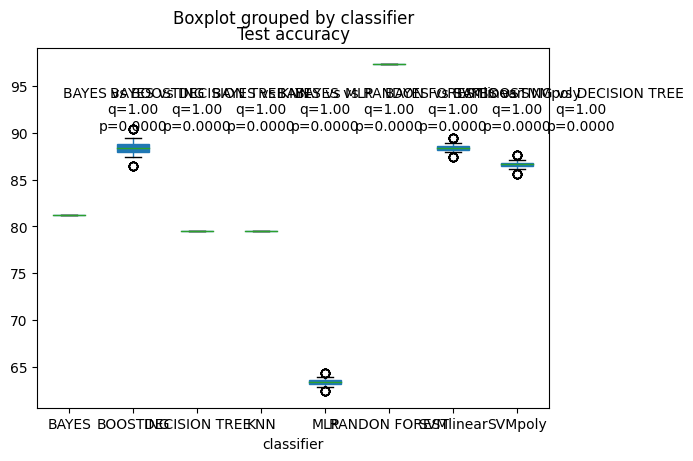

In [102]:
plot_tukey_results(groups_cnn.get_group('inceptionv3'), 'classifier', 'Test accuracy')

In [97]:
groups_cnn.get_group('inceptionv3')

,n,classifier,cnn,Training accuracy,Test accuracy,Training recall,Test recall,Training precision,Test precision,Training f1 Score,Test f1 Score
0,0,RANDON FOREST,inceptionv3,99.00,97.32,100.00,96.44,97.29,96.29,95.0,96.0
1,1,RANDON FOREST,inceptionv3,100.00,97.32,98.00,98.44,97.29,98.29,99.0,98.0
2,2,RANDON FOREST,inceptionv3,100.00,97.32,100.00,97.44,97.29,97.29,97.0,97.0
3,3,RANDON FOREST,inceptionv3,100.00,97.32,99.00,97.94,97.29,97.79,98.0,97.5
4,4,RANDON FOREST,inceptionv3,99.50,97.32,100.00,96.94,97.29,96.79,96.0,96.5
...,...,...,...,...,...,...,...,...,...,...,...
7895,7895,MLP,inceptionv3,70.21,63.49,70.59,64.02,67.37,67.57,62.0,62.0
7896,7896,MLP,inceptionv3,70.01,63.29,70.39,63.82,67.57,67.37,62.0,62.0
7897,7897,MLP,inceptionv3,70.11,63.39,70.49,63.92,67.47,67.47,62.0,62.0
7898,7898,MLP,inceptionv3,69.91,63.19,70.29,63.72,67.67,67.27,62.0,62.0


In [54]:
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load data

In [57]:
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36
